In [1]:
#5.6 Affline / Softmaxレイヤの実装
#5.6.1 Affline

#おさらい
#3.3 多次元配列の計算
import numpy as np
A = np.array([1,2,3,4])
print(A)


[1 2 3 4]


In [2]:
np.ndim(A)

1

In [3]:
A.shape

(4,)

In [4]:
A.shape[0]

4

In [5]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [6]:
np.ndim(B)

2

In [7]:
B.shape

(3, 2)

In [8]:
A = np.array([[1,2],[3,4]])

In [9]:
A.shape

(2, 2)

In [10]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [11]:
np.dot(A, B)
\

array([[19, 22],
       [43, 50]])

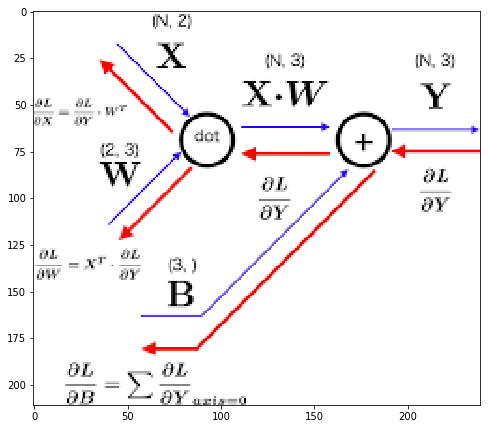

In [12]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod029.png')
plt.figure(figsize=(8, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

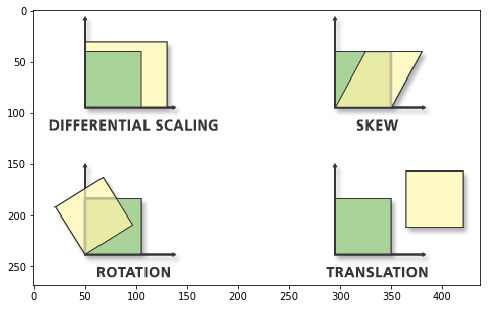

In [4]:
#因みにshapeはカタチづけるとか方向づける
#Affin空間
#こればかりはイメージで入ったほうが早い。
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod030.png')
plt.figure(figsize=(8, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [5]:
#図形を変換するって感じかな。
#専門的用語をかますと、幾何学の分野である図形を回転させたり引き延ばす変換処理の事をaffin変換という。
#平行移動、線形変換を組み合わせた変換の事。

#線形変換；変換の前に直線だった場所は、返還後も直線のまま保たれる、変換の事。直線が変換によって曲がる事もない。
#直線上に点A,B,Cが並んでいた時、変換の前後でAB:BCの比が変換しない。
#線の形が変わらないから線形変換

#Differential scaling：差動スケーリング
#skew：ゆがみ
#rotation：回転
#translation：置き換え

#2次元の図形だと、線形変換は元の座標に2x2の行列を掛ける事で表現可能
#平行移動は2次元のベクトルの加算で表現可能。
#x,yが元の座標、x',y'が返還後の座標。
#２ｘ２の行列が線形変換でtx,tyが平行移動

#(x')=(a b)(x)   (tx)
#(y')=(c d)(y) + (ty)

#次元を1つ上げた3次元の座標（同次座標と呼ぶ）を導入すると、上記を1つの行列の乗算にまとめてしまう事が可能。
#これを同次変換という

#(x')=(a b tx)(x)
#(y')=(c d ty)(y)
#(1) =(0 0  1)(1)

#これが座標変換であり、例えばUnityとかで座標があってx,y,z軸があって、その0を基準に±で考えるよね。
#つまり、初めて聞いたような言葉であっても知らないうちに使っている場合があるのであーる。

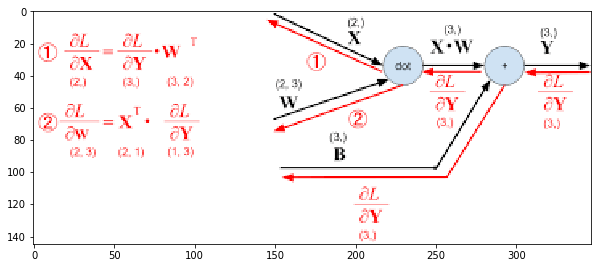

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod031.png')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

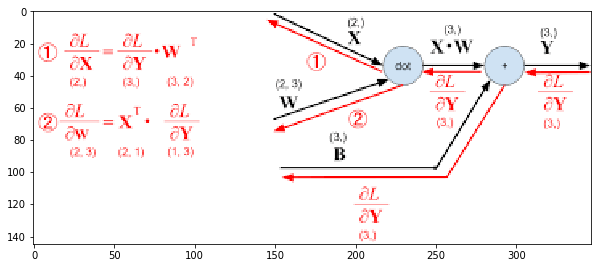

In [4]:
#上記は既に完成形の図だからややこしいけれど、Affineレイヤーの計算式
#行列の積を計算するノードを[dot]として表すことにすると、np.dot(X ,W) + Bの計算は上記で表せる。
#(N, 2)X
#(2, 3)W
#(3,  )B
#これまで見て来た計算グラフはスカラ値（「スカラーとは、配列とかと異なり、より小さな部分に'分割する'ことが できない値のことです。」）
#がノード間で流れていたが、今回は行列がノード間を伝播することになる。

#逆伝播の考え方も行列の要素ごとに書き、同手順で計算することが可能
#∂L/∂X = ∂L/∂Y・W^T ※Tは転置を表す。W(i,j)→W(j,i)の要素に入れ替える事を言う。
#                          (W11 W21)
#W = (W11 W12 W13) → W^T  (W12 W22)
#    (W21 W22 W23)         (W13 W23)

#∂L/∂X = ∂L/∂Y・W^T
# (2,)     =  (3,) ・(3,2)

#∂L/∂W = X^T・∂L/∂Y
#(2,3) = (2,1)・(1,3,)

#X = ∂L/∂X　は同形状
#W = ∂L/∂W  も同形状

#X       = (x0,x1,…xn)
#∂L/∂X = (∂L/∂x0,∂L/∂x1,…,∂L/∂xn)
#上記の数式も同じとなる

#行列の積は対応する次元の要素数を一致させる必要があり、その一致を確認する事で、数式
#∂L/∂X = ∂L/∂Y・W^T
# (2,)     =  (3,) ・(3,2)
#を導き出せる。
#例) ∂L/∂Y  (3,) W(2,3)の時、∂L/∂Xの形状が(2,)になるように　∂L/∂Y　と　W　の積を考える
#そうすると
#∂L/∂Y・W^T = ∂L/∂X
# (3,)　 (3,2)   (2,)

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod031.png')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [ ]:
#①∂L/∂Y・W^T = ∂L/∂X　のように計算グラフを見て導き出せ羽陽になる
# 　(3,)　 (3,2)   　(2,)